### Q. Ranking Data - Understanding the co-relation between keyword rankings with description or any other attribute.

In [44]:
import pandas as pd
import yake
import seaborn as sns

In [3]:
df_ranking = pd.read_csv('browser_rankings_data.csv')

In [4]:
df_ranking = df_ranking.reset_index()

In [5]:
df_ranking.head(5)

level_0  level_1 level_2  level_3   level_4     level_5  \
0      ID  Keyword    Rank  Country  Language        Date   
1       1  browser       2       in        en  2020-12-16   
2       2  browser       3       in        en  2020-12-16   
3       3  browser       4       in        en  2020-12-16   
4       3  browser       4       in        en  2020-12-16   

                level_6                          level_7  \
0                App ID  Date of Last Description Change   
1  net.fast.web.browser                       2020-12-18   
2    com.android.chrome                       2020-12-18   
3     com.opera.browser                       2021-02-27   
4     com.opera.browser                       2020-12-18   

                                             level_8  \
0                                  Short Description   
1  The small, fastest, secure Web Browser, best m...   
2  Fast, simple, and secure. Google Chrome browse...   
3  Fast, safe web browser: free VPN, Ad blocker, ...   
4  Fast, safe web browser: free VPN, Ad blocker, ...   

                                    browser_rankings  
0                                   Long Description  
1  One of the smallest, fastest, secure Web Brows...  
2  Google Chrome is a fast, easy to use, and secu...  
3  Fast, safe and private, introducing the latest...  
4  Opera is a fast, safe web browser for your And...

In [6]:
df_ranking.columns = df_ranking.iloc[0]

In [7]:
df_ranking.drop(index=df_ranking.index[0], 
        axis=0, 
        inplace=True)

In [8]:
df_ranking.head(5)

0 ID  Keyword Rank Country Language        Date                  App ID  \
1  1  browser    2      in       en  2020-12-16    net.fast.web.browser   
2  2  browser    3      in       en  2020-12-16      com.android.chrome   
3  3  browser    4      in       en  2020-12-16       com.opera.browser   
4  3  browser    4      in       en  2020-12-16       com.opera.browser   
5  4  browser    1      in       en  2020-12-16  com.cloudmosa.puffinTV   

0 Date of Last Description Change  \
1                      2020-12-18   
2                      2020-12-18   
3                      2021-02-27   
4                      2020-12-18   
5                      2021-02-07   

0                                  Short Description  \
1  The small, fastest, secure Web Browser, best m...   
2  Fast, simple, and secure. Google Chrome browse...   
3  Fast, safe web browser: free VPN, Ad blocker, ...   
4  Fast, safe web browser: free VPN, Ad blocker, ...   
5  Puffin TV Browser - One App to Watch All Video...   

0                                   Long Description  
1  One of the smallest, fastest, secure Web Brows...  
2  Google Chrome is a fast, easy to use, and secu...  
3  Fast, safe and private, introducing the latest...  
4  Opera is a fast, safe web browser for your And...  
5  Puffin TV Browser is a special edition of Puff...

In [9]:
df_ranking.shape

(3066, 10)

In [10]:
df_ranking.describe()

0          ID  Keyword  Rank Country Language        Date  \
count    3066     3066  3050    3066     3066        3066   
unique   2088        7   119       1        1          76   
top     53190  browser     1      in       en  2021-01-27   
freq        4      608   562    3066     3066          41   

0                              App ID Date of Last Description Change  \
count                            3066                            3066   
unique                              8                               6   
top     com.duckduckgo.mobile.android                      2020-12-18   
freq                              740                            2088   

0                                       Short Description  \
count                                                3066   
unique                                                  9   
top     Browse the web privately, search anonymously, ...   
freq                                                  740   

0                                        Long Description  
count                                                3066  
unique                                                 13  
top     Privately browse the internet, for free! The B...  
freq                                                  370

In [17]:
df_ranking['Short Description'].unique()

array(['The small, fastest, secure Web Browser, best mobile browser, fast search Google.',
       'Fast, simple, and secure. Google Chrome browser for Android phones and tablets.',
       'Fast, safe web browser: free VPN, Ad blocker, QR-code reader &amp; personalized news',
       'Puffin TV Browser - One App to Watch All Videos on the Web',
       'Puffin TV Browser - One App to Watch All Videos on the Web.',
       'Free, safe internet browser! Private browsing, search engine &amp; pop-up blocker.',
       'Fast &amp; private web browser with ad blocker, sync, dark &amp; private mode.',
       'Browse the web privately, search anonymously, and escape ad trackers.',
       'Funny video, Football &amp; celebrity news, Fast &amp; data-saving browser.'],
      dtype=object)

In [46]:
def mean_score_for_keywords(row):
    short_Description = str(row['Short Description'])
    long_Description = str(row['Long Description'])
    
    kw_extractor = yake.KeywordExtractor(top=10, stopwords=None)
    keywords = kw_extractor.extract_keywords(short_Description)
    scores = [1-x[1] for x in keywords]
    row['mean_score_short_description'] = sum(scores)/len(scores)
    
    kw_extractor = yake.KeywordExtractor(top=10, stopwords=None)
    keywords = kw_extractor.extract_keywords(long_Description)
    scores = [1-x[1] for x in keywords]
    row['mean_score_long_description'] = sum(scores)/len(scores)
    
    return row



In [47]:
df_ranking = df_ranking.apply(lambda row: mean_score_for_keywords(row), axis=1)

In [49]:
df_ranking.head(5)

0 ID  Keyword  Rank Country Language        Date                  App ID  \
1  1  browser     2      in       en  2020-12-16    net.fast.web.browser   
2  2  browser     3      in       en  2020-12-16      com.android.chrome   
3  3  browser     4      in       en  2020-12-16       com.opera.browser   
4  3  browser     4      in       en  2020-12-16       com.opera.browser   
5  4  browser     1      in       en  2020-12-16  com.cloudmosa.puffinTV   

0 Date of Last Description Change  \
1                      2020-12-18   
2                      2020-12-18   
3                      2021-02-27   
4                      2020-12-18   
5                      2021-02-07   

0                                  Short Description  \
1  The small, fastest, secure Web Browser, best m...   
2  Fast, simple, and secure. Google Chrome browse...   
3  Fast, safe web browser: free VPN, Ad blocker, ...   
4  Fast, safe web browser: free VPN, Ad blocker, ...   
5  Puffin TV Browser - One App to Watch All Video...   

0                                   Long Description  \
1  One of the smallest, fastest, secure Web Brows...   
2  Google Chrome is a fast, easy to use, and secu...   
3  Fast, safe and private, introducing the latest...   
4  Opera is a fast, safe web browser for your And...   
5  Puffin TV Browser is a special edition of Puff...   

0  mean_score_short_description  mean_score_long_description  
1                      0.976741                     0.966809  
2                      0.871474                     0.945830  
3                      0.924754                     0.957703  
4                      0.924754                     0.963566  
5                      0.908757                     0.940173

In [50]:
df_ranking.dropna(subset=['Rank'], inplace=True)

In [51]:
df_ranking['Rank'] = df_ranking.Rank.apply(lambda x: int(x))

In [52]:
df_ranking.corr()

0                                 Rank  mean_score_short_description  \
0                                                                      
Rank                          1.000000                      0.387673   
mean_score_short_description  0.387673                      1.000000   
mean_score_long_description   0.194387                      0.172821   

0                             mean_score_long_description  
0                                                          
Rank                                             0.194387  
mean_score_short_description                     0.172821  
mean_score_long_description                      1.000000

<AxesSubplot:xlabel='0', ylabel='0'>

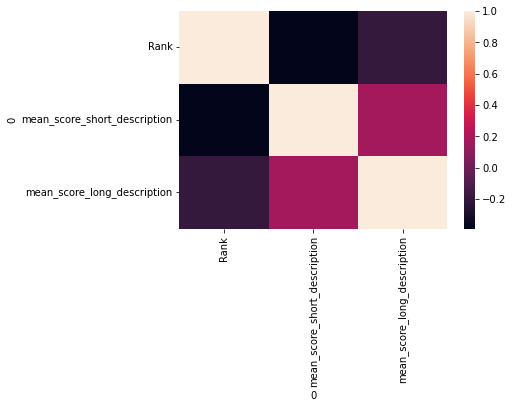

In [45]:
sns.heatmap(df_ranking.corr())

Here score represents that as score is lower, importance is high for keyword and as score is higher importance is low for keyword.

So similare rules can be followed for mean score also.

Here we can see that mean score for short description and Rank has R value 0.3876 
So Short Description has Positive Correlations with Rank but not very strong but Good Correlation we can say.

Similarly we can see that mean score for long description and Rank has R value 0.1943
So Long Discription has Positive Correlations with Rank, it is also not strong.

Short Description has better correlations with Rank compare to Long Description

In [53]:
df_ranking['App ID'] = df_ranking['App ID'].apply(lambda x: str(x))

In [59]:
df_ranking.groupby('App ID').agg({'mean_score_short_description': 'mean', 
                                 'mean_score_long_description': 'mean', 
                                 'Rank': ['min', 'max', 'mean', 'count']})

0                             mean_score_short_description  \
                                                      mean   
App ID                                                       
com.android.chrome                                0.871474   
com.brave.browser                                 0.817608   
com.cloudmosa.puffinTV                            0.908757   
com.duckduckgo.mobile.android                     0.873713   
com.opera.browser                                 0.924754   
com.transsion.phoenix                             0.899578   
com.vivaldi.browser                               0.946990   
net.fast.web.browser                              0.976741   

0                             mean_score_long_description Rank       \
                                                     mean  min  max   
App ID                                                                
com.android.chrome                               0.945830    1   20   
com.brave.browser                                0.977481    1   13   
com.cloudmosa.puffinTV                           0.947135    1   14   
com.duckduckgo.mobile.android                    0.894732    1   44   
com.opera.browser                                0.960635    1   14   
com.transsion.phoenix                            0.960281    6  119   
com.vivaldi.browser                              0.961993   17  134   
net.fast.web.browser                             0.966809    1   24   

0                                               
                                    mean count  
App ID                                          
com.android.chrome              9.697368   152  
com.brave.browser               3.181081   370  
com.cloudmosa.puffinTV          3.815789   608  
com.duckduckgo.mobile.android   7.386486   740  
com.opera.browser               4.848684   304  
com.transsion.phoenix          25.935135   370  
com.vivaldi.browser            67.104520   354  
net.fast.web.browser            6.335526   152

As we can see here,

between App ID and Rank we are not seeing much correlations. While for some places 
App ID has more count, Rank variance and mean are behaving same with the App ID has low count.

Any trend can not be seen here.

